In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar

In [29]:
#Reading the data
df = pd.read_csv("Data\eplplayershooting2122v2.csv")

In [30]:
df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches,-9999
0,1,Max Aarons,eng ENG,DF,Norwich City,21,2000,32.0,0.00,0.41,...,0.0,0.0,0.0,0.02,0.02,0.05,-0.02,-0.02,Matches,774cf58b
1,2,Che Adams,sct SCO,FW,Southampton,25,1996,22.7,0.31,2.16,...,0.0,0.0,0.0,0.31,0.31,0.14,-0.00,-0.00,Matches,f2bf1b0f
2,3,Rayan Aït Nouri,fr FRA,DF,Wolves,20,2001,20.3,0.05,0.64,...,0.0,0.0,0.0,0.03,0.03,0.06,0.01,0.01,Matches,9b398aea
3,4,Kristoffer Ajer,no NOR,DF,Brentford,23,1998,22.2,0.05,0.32,...,0.0,0.0,0.0,0.04,0.04,0.11,0.01,0.01,Matches,a8c0acb7
4,5,Nathan Aké,nl NED,DF,Manchester City,26,1995,10.3,0.19,0.49,...,0.0,0.0,0.0,0.11,0.11,0.23,0.09,0.09,Matches,eaeca114


In [31]:
df.Player.unique()

array(['Max Aarons', 'Che Adams', 'Rayan Aït Nouri', 'Kristoffer Ajer',
       'Nathan Aké', 'Marc Albrighton', 'Thiago Alcántara',
       'Trent Alexander-Arnold', 'Alisson', 'Allan', 'Dele Alli',
       'Miguel Almirón', 'Marcos Alonso', 'Steven Alzate',
       'Daniel Amartey', 'Joachim Andersen', 'Michail Antonio',
       'Cameron Archer', 'Alphonse Areola', 'Adam Armstrong',
       'Stuart Armstrong', 'Kepa Arrizabalaga', 'Harrison Ashby',
       'Pierre-Emerick Aubameyang', 'Jordan Ayew', 'Luke Ayling',
       'César Azpilicueta', 'Daniel Bachmann', 'Leon Bailey',
       'Eric Bailly', 'Folarin Balogun', 'Patrick Bamford',
       'Shandon Baptiste', 'Ross Barkley', 'Ashley Barnes',
       'Harvey Barnes', 'Lewis Bate', 'Mads Bech Sørensen',
       'Jan Bednarek', 'Donny van de Beek', 'Asmir Begović',
       'Saïd Benrahma', 'Rodrigo Bentancur', 'Christian Benteke',
       'Jóhann Berg Guðmundsson', 'Steven Bergwijn', 'Ryan Bertrand',
       'Mads Bidstrup', 'Yves Bissouma', 'Will

In [32]:
df = df[(df["Player"]=="Mohamed Salah") | (df["Player"]=="Son Heung-min")].reset_index()

In [33]:
df

,index,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,...,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches,-9999
0,216,217,Son Heung-min,kr KOR,FWMF,Tottenham,29,1992,33.4,0.69,...,0.06,0.00,0.0,0.49,0.49,0.19,0.20,0.20,Matches,92e7e919
1,429,430,Mohamed Salah,eg EGY,FW,Liverpool,29,1992,30.7,0.75,...,0.03,0.16,0.2,0.71,0.55,0.13,0.04,0.03,Matches,e342ad68


In [34]:
df.dtypes

index        int64
Rk           int64
Player      object
Nation      object
Pos         object
Squad       object
Age          int64
Born         int64
90s        float64
Gls        float64
Sh         float64
SoT        float64
SoT%       float64
Sh/90      float64
SoT/90     float64
G/Sh       float64
G/SoT      float64
Dist       float64
FK         float64
PK         float64
PKatt      float64
xG         float64
npxG       float64
npxG/Sh    float64
G-xG       float64
np:G-xG    float64
Matches     object
-9999       object
dtype: object

In [35]:
df = df.drop(["index", "Rk", "Nation", "Pos", "Squad", "Age", "Born", "90s", "FK", "PK", "PKatt","Matches","G-xG","np:G-xG","-9999"],axis=1)

In [36]:
df

,Player,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,xG,npxG,npxG/Sh
0,Son Heung-min,0.69,2.57,1.41,54.7,2.57,1.41,0.27,0.49,15.4,0.49,0.49,0.19
1,Mohamed Salah,0.75,4.36,1.60,36.6,4.37,1.60,0.13,0.37,15.5,0.71,0.55,0.13


In [37]:
#Get paramaters
params = list(df.columns)
params = params[1:]
params

['Gls',
 'Sh',
 'SoT',
 'SoT%',
 'Sh/90',
 'SoT/90',
 'G/Sh',
 'G/SoT',
 'Dist',
 'xG',
 'npxG',
 'npxG/Sh']

In [50]:
#Add ranges to list of tuple pairs
ranges = []
son_values = []
salah_values = []

for x in params:
    a = min(df[params][x])
    a = a - (a*.2)
    
    b = min(df[params][x])
    b = b + (b*.5)

    ranges.append((a,b))

for x in range(len(df["Player"])):
    if df["Player"][x] == "Son Heung-min":
        son_values = df.iloc[x].values.tolist()
    if df["Player"][x] == "Mohamed Salah":
        salah_values = df.iloc[x].values.tolist()
        
son_values = son_values[1:]
salah_values = salah_values[1:]

values = [son_values, salah_values]

In [39]:
values

[[0.69, 2.57, 1.41, 54.7, 2.57, 1.41, 0.27, 0.49, 15.4, 0.49, 0.49, 0.19],
 [0.75, 4.36, 1.6, 36.6, 4.37, 1.6, 0.13, 0.37, 15.5, 0.71, 0.55, 0.13]]

In [40]:
salah_values

[0.75, 4.36, 1.6, 36.6, 4.37, 1.6, 0.13, 0.37, 15.5, 0.71, 0.55, 0.13]

In [63]:
#Title
title = dict(
    title_name = "Son Heung-min",
    title_color = "#172043",
    subtitle_name = "Tottenham",
    subtitle_color = "#172043",
    title_name_2 = "Mohamed Salah",
    title_color_2 = "#dd202e",
    subtitle_name_2 = "Liverpool",
    subtitle_color_2 = "#dd202e",
    title_fontsize = 18,
    subtitle_fontsize = 15
)
endnote = '@ansharalif\nData collected from FBREF / Statsbomb'

In [72]:
from soccerplots.utils import add_image

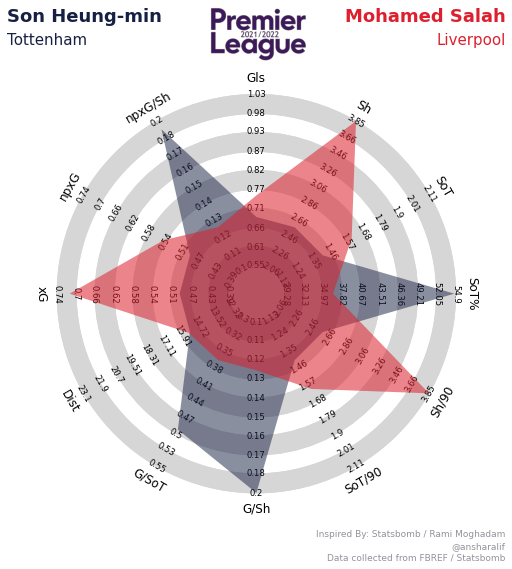

In [74]:
radar = Radar(label_fontsize=12, range_fontsize=8.5)

fig,ax = radar.plot_radar(ranges = ranges, params = params, values = values, radar_color = ["#172043", "#dd202e"],
                         alphas = [0.5,0.55], title = title, endnote = endnote, compare = True)

fig = add_image(image="images/pl_logo.png", fig=fig, left=0.464, bottom=0.81, width=0.1, height=0.075)